### 1. Recopilación y carga de datos

In [11]:
# Manipulación y análisis
import pandas as pd

# Cálculos numéricos
import numpy as np

# Visualización estadística basada en matplotlib
import seaborn as sns

# Creación de gráficos
import matplotlib.pyplot as plt

# Directiva de Jupyter que muestra los gráficos en el notebook
%matplotlib inline

[marketing-analysis.csv](https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv) 

In [3]:
# Carga el archivo CSV "marketing-analysis.csv" en un DataFrame de pandas llamado 'db'.

# El parámetro low_memory=False evita problemas de memoria al cargar archivos grandes
    # permitiendo que pandas lea el archivo completo en memoria sin hacer inferencias
    # por fragmentos, lo que podría causar inconsistencias en tipos de datos.

# db=pd.read_csv("marketing-analysis.csv",low_memory=False)

db = pd.read_csv("marketing-analysis.csv", header=2, low_memory=False)

In [4]:
# Devuelve una tupla con las dimensiones del DataFrame 'db',
    # mostrando el número de filas y columnas en formato (filas, columnas).

# Es útil para conocer rápidamente el tamaño del conjunto de datos.

db.shape

(45211, 19)

In [5]:
# db.head(5) muestra las primeras 5 filas del DataFrame 'db'.

# Es una función muy útil para visualizar rápidamente una muestra de los datos,
    # permitiendo examinar la estructura, las columnas y los valores iniciales
    # del conjunto de datos sin necesidad de mostrar el DataFrame completo.

db.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [6]:
# Establece la columna "customerid" como índice del DataFrame 'db' y 
    # modifica el DataFrame original en lugar de crear una copia.

# El parámetro inplace=True hace que la modificación se aplique directamente 
    # al DataFrame, mientras que la columna "customerid" deja de ser una columna 
    # regular y pasa a ser el índice que identifica cada fila.

db.set_index("customerid", inplace=  True)

In [7]:
db.head(3)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
customerid,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [8]:
# db.info() muestra un resumen completo del DataFrame, incluyendo:
    # - El número total de entradas (filas)
    # - El rango del índice
    # - Los nombres de todas las columnas
    # - El número de valores no nulos en cada columna
    # - Los tipos de datos (dtype) de cada columna
    # - El uso de memoria aproximado

# Es una función muy útil para tener una visión general rápida de la estructura 
    # y contenido del DataFrame, ayudando a identificar posibles problemas como 
    # valores faltantes o tipos de datos incorrectos.

db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 1 to 45211
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       45191 non-null  float64
 1   salary    45211 non-null  int64  
 2   balance   45211 non-null  int64  
 3   marital   45211 non-null  object 
 4   jobedu    45211 non-null  object 
 5   targeted  45211 non-null  object 
 6   default   45211 non-null  object 
 7   housing   45211 non-null  object 
 8   loan      45211 non-null  object 
 9   contact   45211 non-null  object 
 10  day       45211 non-null  int64  
 11  month     45161 non-null  object 
 12  duration  45211 non-null  object 
 13  campaign  45211 non-null  int64  
 14  pdays     45211 non-null  int64  
 15  previous  45211 non-null  int64  
 16  poutcome  45211 non-null  object 
 17  response  45181 non-null  object 
dtypes: float64(1), int64(6), object(11)
memory usage: 6.6+ MB


In [9]:
# db.columns muestra los nombres de todas las columnas del DataFrame 'db'.

# Este comando devuelve un objeto Index de pandas con las etiquetas de cada columna,
    # lo que permite verificar rápidamente qué variables están disponibles en el conjunto de datos
    # y cómo están nombradas para poder referenciarlas correctamente en análisis posteriores.

db.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [10]:
# db.isnull().sum() calcula y muestra el número total de valores nulos 
    # en cada columna del DataFrame 'db'.

# El método isnull() primero crea un DataFrame de booleanos donde cada 
    # valor es True si el valor original es nulo y False si no lo es.

# Luego, sum() cuenta la cantidad de True (valores nulos) en cada columna.
 
# Esta operación es fundamental para evaluar la calidad de los datos,
    # identificar columnas con información faltante y determinar si es necesario
    # realizar algún proceso de imputación o eliminación de registros incompletos.

db.isnull().sum()

age         20
salary       0
balance      0
marital      0
jobedu       0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
dtype: int64

### 2. Limpieza datos
1. Eliminamos columnas y filas
2. Unimos columnas
3. Dividimos columnas
4. Confirmamos que todas las columnas tengan índice y nombre

In [34]:
db.head(5)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
customerid,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [35]:
# Estas líneas dividen la columna "jobedu" en dos columnas separadas:
    # - La primera línea crea una nueva columna 'job' extrayendo la parte antes de la coma
    # - La segunda línea crea una nueva columna 'education' extrayendo la parte después de la coma
    # - El método apply() con una función lambda procesa cada valor de la columna
    # - split(",")[0] divide el texto por la coma y toma el primer elemento (trabajo)
    # - split(",")[1] divide el texto por la coma y toma el segundo elemento (educación)
    # - La última línea muestra el DataFrame resultante con las nuevas columnas añadidas

db['job']= db["jobedu"].apply(lambda x: x.split(",")[0])
db['education']= db["jobedu"].apply(lambda x: x.split(",")[1])
db

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
customerid,,,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary


In [36]:
# Esta línea elimina la columna 'jobedu' del DataFrame 'db' de manera permanente.

# Los parámetros utilizados son:
    #   - labels='jobedu': especifica el nombre de la columna a eliminar
    #   - axis=1: indica que se debe eliminar una columna (axis=0 eliminaría filas)
    #   - inplace=True: aplica la modificación directamente al DataFrame original

# La segunda línea (db) muestra el DataFrame después de la eliminación para
    # verificar que la operación se realizó correctamente.

# Esta eliminación se realiza porque ya hemos extraído la información de 'jobedu'
    # en dos columnas separadas ('job' y 'education'), así que la columna original
    # ya no es necesaria.

db.drop(labels='jobedu', axis = 1, inplace = True)
db

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
customerid,,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45209,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary


Ahora manejamos los valores faltantes, podemos tener de tres tipos:

1. MCAR(Missing completely at random): no dependen de alguna caracteristica en particular
2. MAR(Missing at random): pueden depender de alguna caracteristica
3. MNAR(Missing not at random): hay alguna razón para faltar

Droppamos todos lo que no tienen edad definida:

In [37]:
db = db[~db.age.isnull()].copy()
db.isnull().sum()
db.shape

(45191, 19)

Ahora imputamos los valores para los meses:

In [38]:
month_mode = db.month.mode()[0]
month_mode

'may, 2017'

Ahora procedemos a substituir este valor en nuestra columna con faltante:

In [40]:
db['month'] = db['month'].fillna(month_mode)
db.month.isnull().sum()

np.int64(0)

Ahora manejamos los faltantes en nuestra variable dependiente *(response)*:

In [41]:
db = db[~db.response.isnull()].copy()
db.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

Podriamos sobstituir nuestro valores faltantes con **NaN** para que no haya afectaciones cuando procedemos al analisís estadistico

#### Outliers

Son unos datos que se discostan remarcablemente  del siguiente punto más cercano. Podemos tener:

1. Outlier univariado
2. Outlier multivariado/bivariado: cuando ploteamos una variable con otra el valor se discosta del valor esperado de manera anormal

Antes de proceder a eso tenemos que estandardizar los valores para que escalas diferentes no nos lleven a conclusiones equivocadas. Tenemos diferentes tipologias de datos que podemos encontrar

#### Analisis univariado de variable categorica no ordenada

* no tienen peso o medida
* no tienen orden

In [42]:
db.job.value_counts()

job
blue-collar      9722
management       9451
technician       7589
admin.           5165
services         4148
retired          2262
self-employed    1574
entrepreneur     1484
unemployed       1302
housemaid        1238
student           938
unknown           288
Name: count, dtype: int64

In [43]:
db.job.value_counts(normalize=True)

job
blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: proportion, dtype: float64

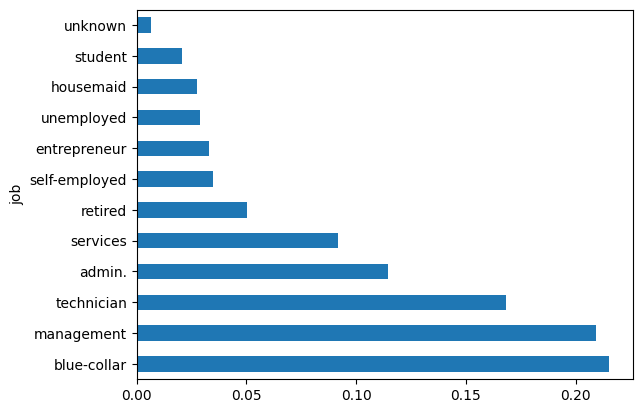

In [45]:
db.job.value_counts(normalize=True).plot.barh()
plt.show()

#### Analisis univariada Variable categorica ordenada

Estas variables tienen un orden natural, por ejemplo:

* Meses
* Educación

In [46]:
db.education.value_counts(normalize=True)


education
secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: proportion, dtype: float64

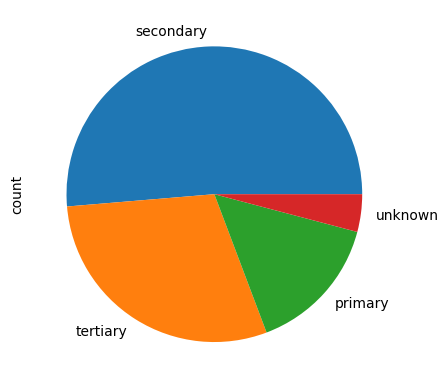

In [47]:
db.education.value_counts().plot.pie()
plt.show()

Si tenemos una variable con valores numericos podemos calcular

In [48]:
db.salary.describe()


count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

Finalmente podemos plotear una densidad de la distribución  de la varaible numerica:

<Axes: xlabel='salary', ylabel='Count'>

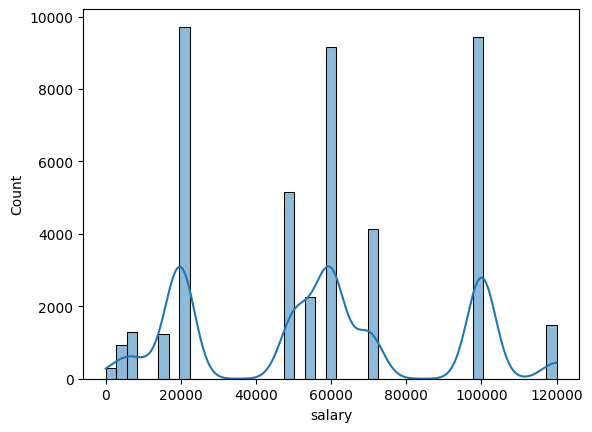

In [50]:
sns.histplot(db['salary'], kde=True)

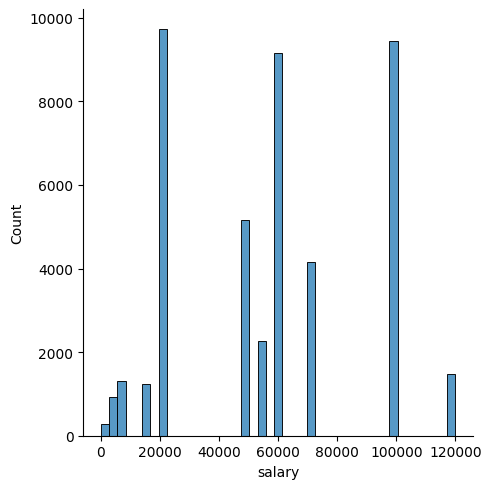

In [51]:
sns.displot(db['salary'])

(0.0, 3000.0)

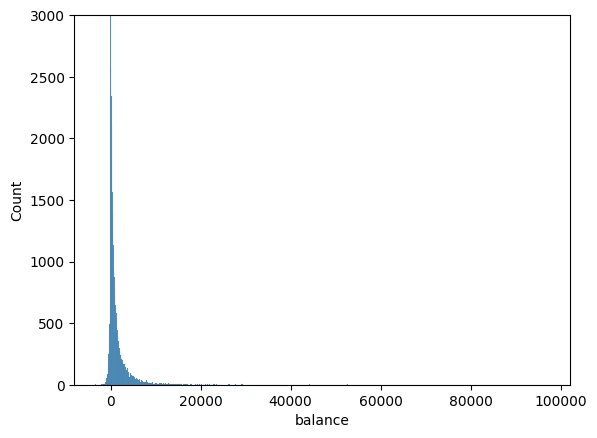

In [52]:
sns.histplot(db['balance'])
plt.xlim(-8019, 102127)
plt.ylim(0,3000)

In [53]:
db.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

### Analisis bivariada

Cuando hacemos un analisis bivariada el uso de graficas nos puede ser extremadamente utíl. En particular los más ocupados son:

* scatter plot
* pair plot
* matriz de correlación

#### Scatter plot

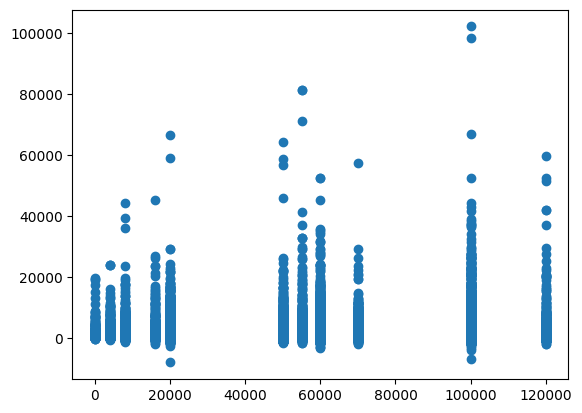

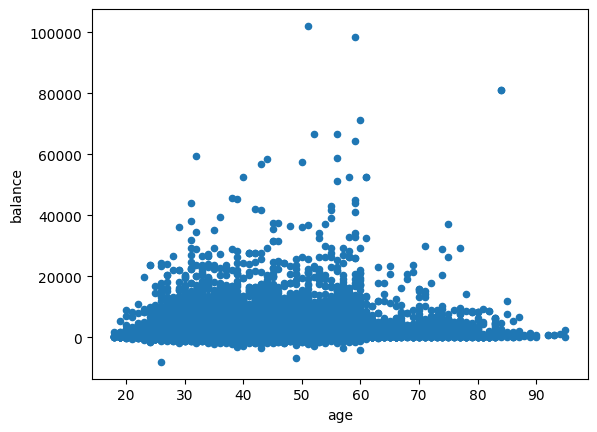

In [54]:
plt.scatter(db.salary,db.balance)
plt.show()

db.plot.scatter(x="age",y="balance")
plt.show()

#### Pair plot

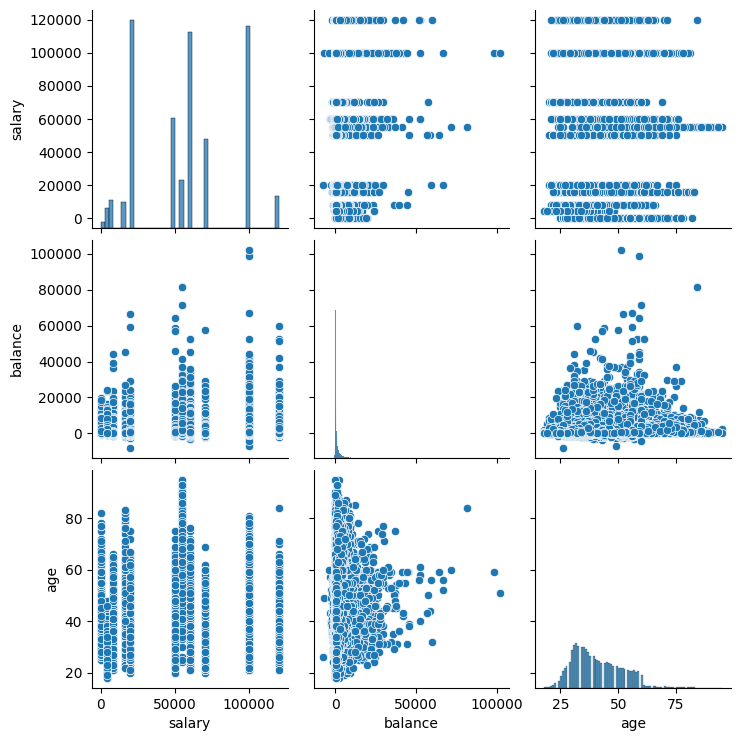

In [55]:
sns.pairplot(data = db, vars=['salary','balance','age'])
plt.show()

#### QQ-Plot

Es un método gráfico para el diagnóstico de diferencias entre la distribución de probabilidad de una población de la que se ha extraído una muestra aleatoria y una distribución usada para la comparación.

<Axes: ylabel='Count'>

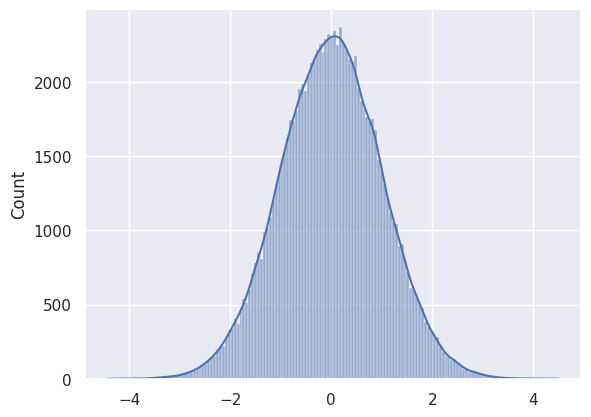

In [58]:
import scipy.stats as stats
iris = sns.load_dataset('iris')


rvs = stats.norm(loc=0, scale=1)
normal_sample = rvs.rvs(size=100000)
sns.set()
sns.histplot(normal_sample, kde=True)

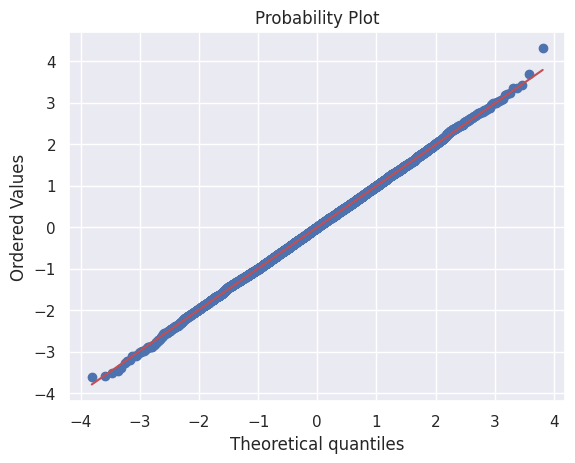

In [59]:
normal_sample = rvs.rvs(size=10000)
stats.probplot(normal_sample, dist="norm", plot=plt)
plt.show()

<Axes: ylabel='Count'>

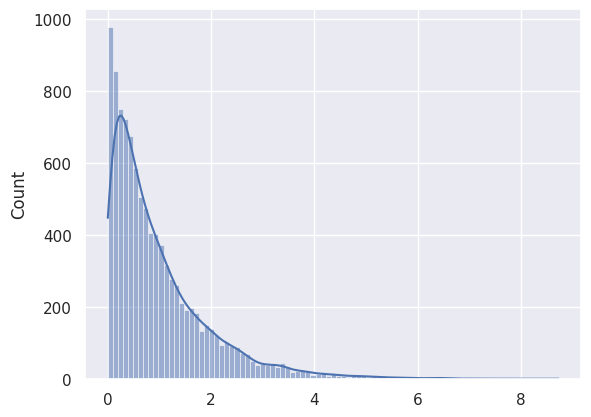

In [61]:
sns.histplot(stats.expon().rvs(size=10000), kde=True)

((array([-4.34602155, -4.14724578, -4.03913009, ...,  4.03913009,
          4.14724578,  4.34602155], shape=(100000,)),
  array([8.24553945e-06, 3.26258701e-05, 3.68887323e-05, ...,
         1.01312182e+01, 1.04248767e+01, 1.05325220e+01], shape=(100000,))),
 (np.float64(0.8978310369111805),
  np.float64(0.9937174245746776),
  np.float64(0.9035129703842338)))

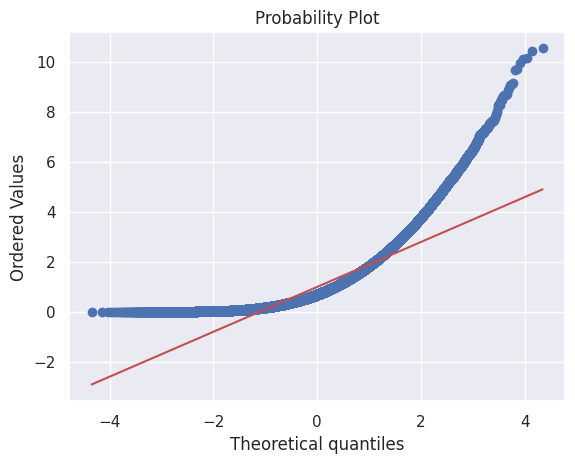

In [62]:
expon_rvs = stats.expon().rvs(size=100000)
normal_rvs = stats.norm().rvs(size=100000)
stats.probplot(x=expon_rvs, dist=stats.norm(), plot=plt)

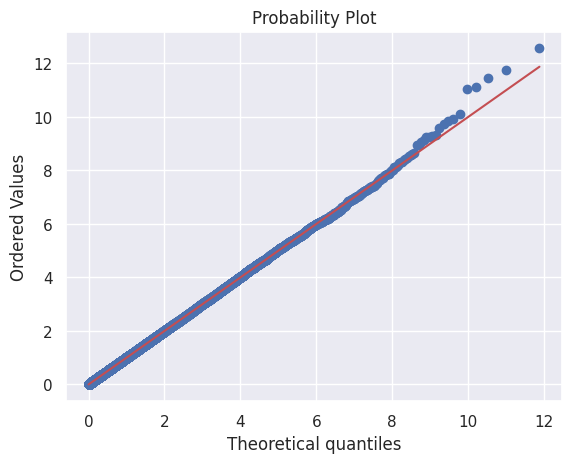

In [63]:
expon_rvs = stats.expon().rvs(size=100000)
stats.probplot(x=expon_rvs, dist="expon", plot=plt)
plt.show()

#### Matrices de correlación

Cuando queremos ver en un unico grafico las relaciones entre más de una variable de forma sintetica

In [64]:
db[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


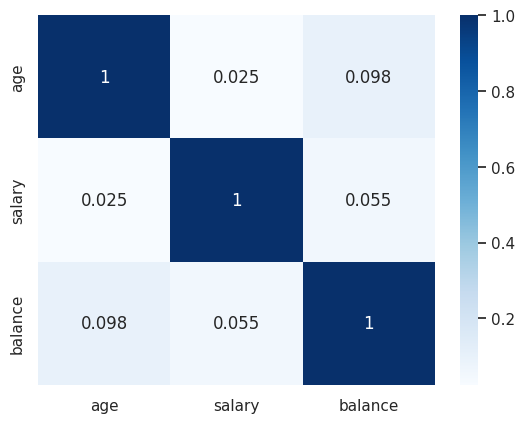

In [65]:
sns.heatmap(db[['age','salary','balance']].corr(), annot=True, cmap = 'Blues')
plt.show()

#### variables categoricas numericas

Normalmente se analizan con base en su media, mediana y un instrumento particularmente util es el *boxplot*.

Calculamolos a manita:

In [66]:
db.groupby('response')['salary'].mean()


response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [67]:
db.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

Pareciera no haber grandes diferencias, pero analizando los boxplot descubrimos que:

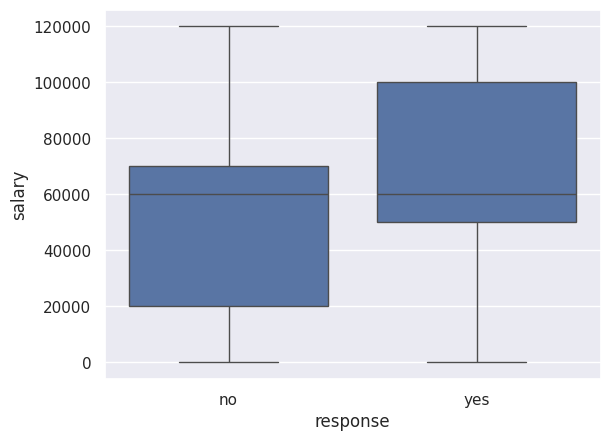

In [68]:
sns.boxplot(x=db.response, y=db.salary)
plt.show()

([0, 1], [Text(0, 0, 'no'), Text(1, 0, 'yes')])

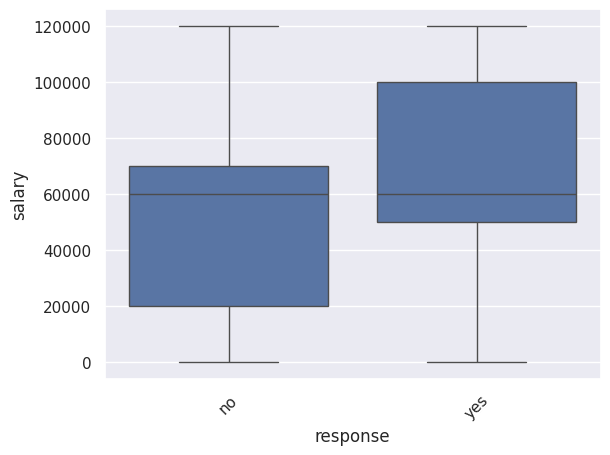

In [69]:
ax = sns.boxplot(x='response', y='salary', data=db)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

#### Analisis variables categoricas

Queremos analizar como diferentes varbles categoricas (como la educación) tienen impacto en la variable dependiente.. Para hacer eso necesitamos convertir *Response* en una variable binaria.

In [70]:
db['response_rate'] = np.where(db.response=='yes',1,0)
db.response_rate.value_counts()

response_rate
0    39876
1     5285
Name: count, dtype: int64

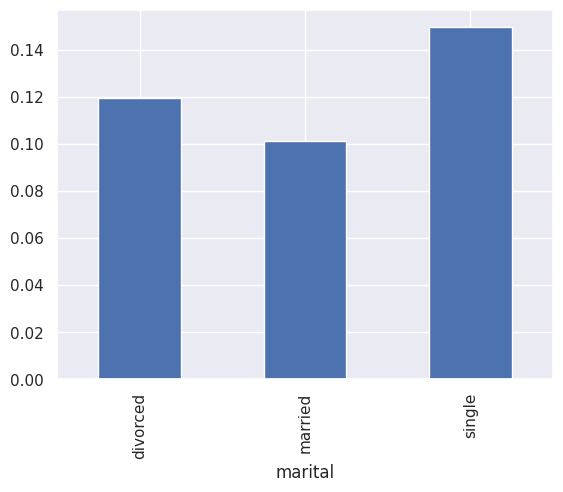

In [71]:
db.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

### Analisis multivariado

Antes tenemos crear una tabla pivot con en las columnas los diferentes status civiles:

In [72]:
result = pd.pivot_table(data=db, index='education', columns='marital',values='response_rate')
result

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


Ahora como antes vamos a imprimir una mapa de calor.

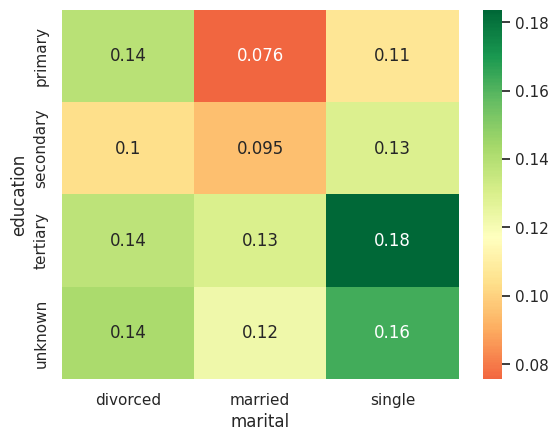

In [73]:
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

## Apis y carca de datos

Podemos cargar los datos de local, commo hicimos antes en nuestro ejercicio, por medio de una url o con unas APIs.

In [75]:
# Updated World Bank climate data API endpoint
url = "https://climatedata.worldbank.org/api/data/cru-ts-4.06-timeseries/tas/year/ROU"
# Or try their general data API
# url = "https://api.worldbank.org/v2/country/ROU/indicator/EN.ATM.TEMP.C?format=json"

try:
    df = pd.read_json(url)
    print(df.head())
except Exception as e:
    print(f"Error: {e}")
    # Fallback to alternative data source

Error: HTTP Error 403: Forbidden


Pero ahora sí pasamos a las APis

>Blockquote
Una API, o interfaz de programación de aplicaciones, es un servidor que puede utilizar para recuperar y enviar datos mediante código. Las API se utilizan con mayor frecuencia para recuperar datos.

¿Por que usar una API?

1. Los datos cambía rápido, y no tiene sentido estar generando un dataset y bajandolo cada munuto.
2. Necesitas acceder a sólo una parte de los datos
3. Hay una computación repetida involucrada

Podemos hacer diferentes acciones con las API:

* GET
* POST
* PUT
* DELETE

In [ ]:
import requests
response = requests.get('https://google.com/')
print(response)

<Response [200]>


![](https://github.com/rafneta/CienciaDatosPythonCIDE/blob/master/Laboratorios/Lab11/response.PNG?raw=1)

La libreria request tiene algunas funciones especificas:

In [ ]:
print(response.status_code)

200


In [ ]:
if response:
  print('Request is successful.')
else:
  print('Request returned an error.')

Request is successful.


El endpoint es una dirección, usuaklmente, hacía donde apunta nuestro pedido. Normalmente el nombre de esta dirección es autodescriptivo.

In [ ]:
response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)

200


In [ ]:
pd.DataFrame(response.json()["people"])

,name,craft
0,Mark Vande Hei,ISS
1,Oleg Novitskiy,ISS
2,Pyotr Dubrov,ISS
3,Thomas Pesquet,ISS
4,Megan McArthur,ISS
5,Shane Kimbrough,ISS
6,Akihiko Hoshide,ISS


Muchas veces necesitamos una llave para poder acceder a los datos que requerimos. Igual hay un verdadero mercado y sitio especializados para esto.

Por medio de los encabezaados HTTPS se manejan algunas informaciones sobre las APIs


In [ ]:
response = requests.get("https://api.thedogapi.com/v1/breeds/1")
response.headers

{'Content-Encoding': 'gzip', 'Content-Type': 'application/json; charset=utf-8', 'Date': 'Fri, 07 May 2021 12:19:43 GMT', 'Server': 'Apache/2.4.46 (Amazon)', 'Strict-Transport-Security': 'max-age=15552000; includeSubDomains', 'Vary': 'Origin,Accept-Encoding', 'X-Content-Type-Options': 'nosniff', 'X-DNS-Prefetch-Control': 'off', 'X-Download-Options': 'noopen', 'X-Frame-Options': 'SAMEORIGIN', 'X-Response-Time': '2ms', 'X-XSS-Protection': '1; mode=block', 'Content-Length': '265', 'Connection': 'keep-alive'}

Ya sabiendo que es un json, podemos acceder a el atravez de:

In [ ]:
response.json()["name"]

'Affenpinscher'

In [ ]:
endpoint = "https://www.googleapis.com/books/v1/volumes"
query = "la divina comedia"

params = {"q": query, "maxResults": 3}
response = requests.get(endpoint, params=params).json()
for book in response["items"]:
    volume = book["volumeInfo"]
    title = volume["title"]
    published = volume["authors"]
    print(f"{title} {published} ")

La Divina Comedia ['Dante Alighieri'] 
La divina comedia ['Dante Alghieri'] 
La Divina Comedia por Dante Alighieri ['Dante Alighieri'] 


In [ ]:
response

{'kind': 'books#volumes',
 'totalItems': 734,
 'items': [{'kind': 'books#volume',
   'id': 'WrPCDwAAQBAJ',
   'etag': 'j6ynahmNPaE',
   'selfLink': 'https://www.googleapis.com/books/v1/volumes/WrPCDwAAQBAJ',
   'volumeInfo': {'title': 'La Divina Comedia',
    'authors': ['Dante Alighieri'],
    'publisher': 'Good Press',
    'publishedDate': '2019-11-11',
    'description': '"La Divina Comedia" de Dante Alighieri (traducido por Manuel Aranda y Sanjuan) de la Editorial Good Press. Good Press publica una gran variedad de títulos que abarca todos los géneros. Van desde los títulos clásicos famosos, novelas, textos documentales y crónicas de la vida real, hasta temas ignorados o por ser descubiertos de la literatura universal. Editorial Good Press divulga libros que son una lectura imprescindible. Cada publicación de Good Press ha sido corregida y formateada al detalle, para elevar en gran medida su facilidad de lectura en todos los equipos y programas de lectura electrónica. Nuestra meta 

Fuentes:
* [TWS](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14)